# CISC 6930 Assignment 4 Question 1

In [1]:
# Import packages 
import numpy as np
import pandas as pd
from scipy.io import arff
import time
import matplotlib.pyplot as plt

Implement the $k$-means clustering algorithm and investigate the effects of different starting configurations. Work with the $\texttt{segment.arff}$ dataset. This dataset is based on a set of images taken in color around the UMASS campus to which low-level image processing operators were applied. The goal is to find clusters in the data which define different types of objects (buildings, trees, sky, etc). Don't be concerned with understanding the meaning of each cluster. 

Remember to $z$-score normalize the data as a preprocessing step before proceeding with the clustering. Again, $k$ is a tuning parameter and should be abstracted from the core clustering subroutine; vary $k$ and observe the effects. 

**Random Starting Positions** 

$k$-means is sensitive to the starting positions of the cluster centroids. To try to overcome this run $k$-means $25$ times with randomized starting positions for the cluster centroids. For an actual application, the centroids would be selected though a randomization process. For this exercise, $300$ instance numbers are provided to use (counting to start at the first instance in the dataset). To illustrate the approach, consider $5$-means. This needs $5$ centroid instances for each of $25$ trials, or a total of $125$ indices into the dataset. From the following list, select the first $5$ items for the first iteration, the next $5$ for the second iteration and so on.

The $300$ indices are as follows:

In [2]:
# List of indices for centroid instances 
indices = [775, 1020, 200, 127, 329, 1626, 1515, 651, 658, 328,
           1160, 108, 422, 88, 105, 261, 212, 1941, 1724, 704,
           1469, 635, 867, 1187, 445, 222, 1283, 1288, 1766, 1168,
           566, 1812, 214, 53, 423, 50, 705, 1284, 1356, 996,
           1084, 1956, 254, 711, 1997, 1378, 827, 1875, 424, 1790,
           633, 208, 1670, 1517, 1902, 1476, 1716, 1709, 264, 1,
           371, 758, 332, 542, 672, 483, 65, 92, 400, 1079,
           1281, 145, 1410, 664, 155, 166, 1900, 1134, 1462, 954,
           1818, 1679, 832, 1627, 1760, 1330, 913, 234, 1635, 1078,
           640, 833, 392, 1425, 610, 1353, 1772, 908,1964, 1260,
           784, 520, 1363, 544, 426, 1146, 987, 612, 1685, 1121,
           1740, 287, 1383, 1923, 1665, 19, 1239, 251, 309, 245,
           384, 1306, 786, 1814, 7, 1203, 1068, 1493, 859, 233,
           1846, 1119, 469, 1869, 609, 385, 1182, 1949, 1622, 719,
           643, 1692, 1389, 120, 1034, 805, 266, 339, 826, 530, 
           1173, 802, 1495, 504, 1241, 427, 1555, 1597, 692, 178,
           774, 1623, 1641, 661, 1242, 1757, 553, 1377, 1419, 306,
           1838, 211, 356, 541, 1455, 741, 583, 1464, 209, 1615,
           475, 1903, 555, 1046, 379, 1938, 417, 1747, 342, 1148,
           1697, 1785, 298, 1485, 945, 1097, 207, 857, 1758, 1390,
           172, 587, 455, 1690, 1277, 345, 1166, 1367, 1858, 1427,
           1434, 953, 1992, 1140, 137, 64, 1448, 991, 1312, 1628,
           167, 1042, 1887, 1825, 249, 240, 524, 1098, 311, 337,
           220, 1913, 727, 1659, 1321, 130, 1904, 561, 1270, 1250, 
           613, 152, 1440, 473, 1834, 1387, 1656, 1028, 1106, 829,
           1591, 1699, 1674, 947, 77, 468, 997, 611, 1776, 123,
           979, 1471, 1300, 1007, 1443, 164, 1881, 1935, 280, 442,
           1588, 1033, 79, 1686, 854, 257, 1460, 1380, 495, 1701,
           1611, 804, 1609, 975, 1181, 582, 816, 1770, 663, 737,
           1810, 523, 1243, 944, 1959, 78, 675, 135, 1381, 1472]

# Take length of above list to ensure there are enough indices
# for k-means clustering 
len(indices)

300

Running $k$-means entails iteratively moving the centroids to the best possible positions. For each value of $k$ and for the $25$ initial centroid sets, run $k$-means until either the clusters no longer change or the program has conducted $50$ iterations over the dataset, whichever comes first. 

In [3]:
# Import data and store in data frame 
data, metadata = arff.loadarff("segment.arff")
n_data = pd.DataFrame(data)

# Separate the class label from the features 
class_label = n_data.iloc[:, -1]
n_data = n_data.iloc[:, :-1]

# Normalize the features 
for i in range(n_data.shape[1]):
    if n_data.iloc[:,i].std() != 0.0:
        n_data.iloc[:, i] = (n_data.iloc[:, i] - n_data.iloc[:,i].mean()) 
        / (n_data.iloc[:,i].std())

# Store the features in an easy to access array
df = np.array(n_data)

To evaluate the results, compute the sum of squared errors (SSE) for each of the $25$ clustering runs. SSE measures the deviation of points from their cluster centroid and gives a simple measure of the cluster compactness: 
$$ SSE = \sum_{j=1}^k \sum_{x_i \in C_j} \Vert x_i - m_j \Vert^2 $$ 
where the clusters are $C_j$ ($j = 1,\dots,k$), the final centroid for $C_j$ is $m_j$, the $x_i$'s are all the points assigned to $C_j$ and $||a-b||$ is the distance from point $a$ to point $b$. 

In [4]:
# Return the euclidean distance between 2 points 
def euclidean_distance(X,Y):
    return np.sqrt(np.sum((X - Y)**2))

In [5]:
# Return the length of intersecting elements from two lists 
def intersection_length(lst1, lst2): 
    return len(set(lst1).intersection(lst2))

In [6]:
# Classify each points in the dataframe into its cluster 
# based on the euclidean distance
def findMembers(df, indices):
    
    # Store the number of data points in a variable
    n = df.shape[0]
    
    # Create an array of size n by 1 to store each data point's 
    # cluster label
    Xs = np.zeros((n, 1))
    
    # For each data point, find the euclidean distance between it
    # and each indice and store the closest indice 
    for j in range(n):
        dist = []
        for s in indices:
            dist.append([euclidean_distance(df[j], df[s]), s])
        Xs[j][0] = sorted(dist)[0][1]
    
    # Return the array of classified points
    return Xs

In [7]:
# Find the new mean point of each cluster 
def findNewMean(df, points):
    
    # Create an empty list to store distances 
    dist = []
    
    # To allow time complexity to be O(n) rather than O(n^2),
    # note that (n-a) + (n-b) + ... = (n*x) - (a + b + ...)
    # This simple manipulation is done below
    df_scaled = df * len(points)
    sum_points = sum(df[points])
    
    # Calculate the euclidean distance for all data points 
    for i in range(df_scaled.shape[0]):
        dist.append([euclidean_distance(df_scaled[i], sum_points), i])
        
    # Return the new mean based on its shortest distance 
    return sorted(dist)[0][1]

In [8]:
# Calculate the SSE of a cluster based on euclidean distance 
def calculateSSE(df, points):
    
    # Create an empty list to store distances 
    dist = []
    
    # To allow time complexity to be O(n) rather than O(n^2),
    # note that (n-a) + (n-b) + ... = (n*x) - (a + b + ...)
    # This simple manipulation is done below
    df_scaled = df * len(points)
    sum_points = sum(df[points])
    
    # Calculate the euclidean distance for all data points
    for i in range(df_scaled.shape[0]):
        dist.append([euclidean_distance(df_scaled[i], sum_points), i])
    
    # Return the SSE, or euclidean distance of the
    # cluster's points
    return sorted(dist)[0][0]

In [9]:
start = time.time()
# Create an array to store SSE values
SSE = np.zeros((25, 12))

# Allow only a maximum of 50 iterations
# and runs through 25 initial cluster indices
max_iter = 50
cluster_run = 25

# For each k from 1 to 12, perform k-means clustering
for k in range(1,13): 

    # For each initial cluster index, perform k-means clustering
    for i in range(cluster_run):
        
        # Get the initial indices 
        centroids = indices[i*k:(i+1)*k]
        relevant_c = centroids
        
        # For each iteration, classify each data points
        # to its closest cluster mean and find the mean
        # of each cluster 
        for b in range(max_iter):
            
            # Reclassify data points to its closest cluster
            memberList = findMembers(df, relevant_c)
            
            # Create a list to store new centroids
            new_c = []
            
            # For each indice, find the new centroid
            for m in relevant_c: 
                index = np.where(memberList == m)[0]
                new_m = findNewMean(df, index)
                new_c.append(new_m)
            
            # If the new centroids found have already appeared
            # before, meaning convergence has met, then
            # stop k-means clustering and calculate the SSE
            # Else add the new centroids to its list of 
            # previous indices and let the new centroids 
            # be recalculated 
            if intersection_length(centroids, new_c) == k:
                final_c = new_c
                memberList = findMembers(df, final_c)
                tempSSE = 0
                for v in final_c:
                    w = np.where(memberList == v)[0]
                    tempSSE += calculateSSE(df, w)
                SSE[i][k-1] = tempSSE
                break
            else:
                centroids = centroids + new_c
                relevant_c = new_c
    print(k, "-means clustering is finished.")
end = time.time()
print("Time elapsed:", end - start)

1 -means clustering is finished.
2 -means clustering is finished.
3 -means clustering is finished.
4 -means clustering is finished.
5 -means clustering is finished.
6 -means clustering is finished.
7 -means clustering is finished.
8 -means clustering is finished.
9 -means clustering is finished.
10 -means clustering is finished.
11 -means clustering is finished.
12 -means clustering is finished.
Time elapsed: 414.3130829334259


(a) For each $k=1,2,\dots,12$, compute the mean SSE, denoted $\mu_k$ and the sample standard deviation $\sigma_k$, over all $25$ clustering runs for that value of $k$. Generate a line plot of the mean SSE ($\mu_k$) as a function of $k$. Include error bars that indicate the $95\%$ confidence interval: ($\mu_k - 2\sigma_k$ to $\mu_k + 2\sigma_k$)

In [10]:
# Calculate the mean SSE and sample standard deviation 
# over all 25 clustering runs for each k
avgSSE = np.mean(SSE, axis = 0).round(4)
stdSSE = np.std(SSE, axis = 0).round(4)

# Calculate the error to be 2 times the sd 
error = 2 * stdSSE

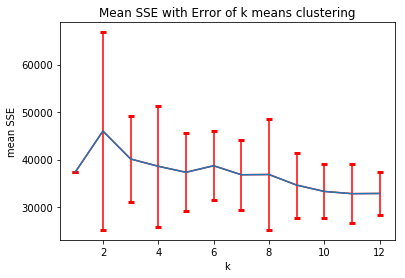

In [11]:
# Create a plot of the mean SSEs with error bars showing
# the 95% confidence interval 
plt.plot(range(1,13), avgSSE, color = 'r')
plt.errorbar(x = range(1,13), y = avgSSE, yerr = error, 
             ecolor = 'r', capsize = 3,  markeredgewidth = 3)
plt.title("Mean SSE with Error of k means clustering")
plt.xlabel("k")
plt.ylabel("mean SSE")
plt.show()

(b) Produce a table containing the $4$ columns: $k$, $\mu_k$, $\mu_k - 2\sigma_k$ and $\mu_k + 2\sigma_k$ for each of the values of $k=1,2,\dots,12$. 

In [12]:
# Produce all values for the table 
k_vals = pd.DataFrame(list(range(1,13)))
avg = pd.DataFrame(avgSSE)
left = pd.DataFrame(avgSSE - error)
right = pd.DataFrame(avgSSE + error)
table = pd.concat([k_vals, avg, left, right], axis = 1)
table.columns = ['k', "$\mu_k$", "$\mu_k-2\sigma_k$", "$\mu_k+2\sigma_k$"]
table

,k,$\mu_k$,$\mu_k-2\sigma_k$,$\mu_k+2\sigma_k$
0,1,37371.1346,37371.1346,37371.1346
1,2,45995.1453,25191.9437,66798.3469
2,3,40118.1075,31090.0833,49146.1317
3,4,38586.1462,25810.1842,51362.1082
4,5,37322.3845,29090.5615,45554.2075
5,6,38700.8073,31411.7667,45989.8479
6,7,36804.2022,29389.0682,44219.3362
7,8,36855.6613,25246.0181,48465.3045
8,9,34628.2882,27773.7948,41482.7816
9,10,33292.5657,27608.4379,38976.6935


In [13]:
# For viewing the table in terminal
print("Table of k, mu_k, mu_k - 2sigma_k, mu_k + 2sigma_k")
for i in range(table.shape[0]):
    print(list(table.loc[i]))

Table of k, mu_k, mu_k - 2sigma_k, mu_k + 2sigma_k
[1.0, 37371.134599999998, 37371.134599999998, 37371.134599999998]
[2.0, 45995.145299999996, 25191.943699999996, 66798.346900000004]
[3.0, 40118.107499999998, 31090.083299999998, 49146.131699999998]
[4.0, 38586.146200000003, 25810.184200000003, 51362.108200000002]
[5.0, 37322.3845, 29090.5615, 45554.207500000004]
[6.0, 38700.8073, 31411.7667, 45989.847900000001]
[7.0, 36804.2022, 29389.068200000002, 44219.336199999998]
[8.0, 36855.6613, 25246.018100000001, 48465.304499999998]
[9.0, 34628.288200000003, 27773.794800000003, 41482.781600000002]
[10.0, 33292.565699999999, 27608.437899999997, 38976.693500000001]
[11.0, 32821.815900000001, 26622.090900000003, 39021.5409]
[12.0, 32867.1319, 28434.734100000001, 37299.529699999999]


(c) As $k$ increases and approaches the total number of examples $N$, what value does the SSE approach? What problems does this cause in terms of using SSE to choose an optimal $k$? 

**Answer:** As $k$ increases and approaches the total number of examples $N$, the SSE approaches $0$. This causes a problem in choosing an optimal $k$ because it would mean that $k = N$ would be the optimal $k$ and its SSE would effectively be $0$. But by having $k=N$, it means there $N$ clusters, each having a single data point. This is a meaningless set of clusters.

(d) Suggest another measure of cluster compactness and separation that might be more useful than SSE? 

**Answer:** Another measure of cluster compactness and separation that might be more useful than SSE is the Dunn Index. It is equal to the minimal inter-cluster distance divided by the maximal cluster size. A high Dunn Index is good; it means minimal inter-cluster distance is maximized and maximal cluster size is minimized. A large inter-cluster distance means that separation is maxed. A small cluster size means clusters are well compacted. 